# Week 3: Working with NC files, regression
You can download this notebook and interact with it in Anaconda Jupyter Notebook.
This week we go over multidimensional gridded data, which are commonly stored as netcdf (NC) files. For example, our global precipitation file is 3-D with dimensions for time, latitude, and longitude. We'll also start discussing regression, a statistical method for fitting a trendline and evaluation correlation between data

In [18]:
import numpy as np
import matplotlib.pyplot as py
import xarray

### Global precipitation example

In [19]:
filename = 'precipdata.nc'
nc_file = xarray.open_dataset(filename)
print(nc_file)

<xarray.Dataset>
Dimensions:    (lat: 72, lon: 144, nv: 2, time: 452)
Coordinates:
  * lat        (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon        (lon) float32 1.25 3.75 6.25 8.75 ... 351.25 353.75 356.25 358.75
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2016-08-01
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) datetime64[ns] ...
    lat_bnds   (lat, nv) float32 ...
    lon_bnds   (lon, nv) float32 ...
    precip     (time, lat, lon) float32 ...
Attributes:
    Conventions:           CF-1.0
    curator:               Dr. Jian-Jian Wang\nESSIC, University of Maryland ...
    description:           http://eagle1.umd.edu/GPCP_ICDR/GPCPmonthlyV2.3.pdf
    citation:              Adler, R.F., G.J. Huffman, A. Chang, R. Ferraro, P...
    title:                 GPCP Version 2.3 Combined Precipitation Dataset (F...
    platform:              NOAA POES (Polar Orbiting Environmental Satellites)
    source_obs:       

In [20]:
#extract variables and put them into numpy arrays
precip = nc_file['precip'].data
time = nc_file['time'].data
lat = nc_file['lat'].data
lon = nc_file['lon'].data
lat_bnds = nc_file['lat_bnds'].data
print(precip.shape, lat.shape, lat_bnds.shape)
print(precip.dtype)

(452, 72, 144) (72,) (72, 2)
float32


In [21]:
meanppt = np.mean(precip, axis = 0) #mean along the 'time' axis
print(meanppt.shape)

(72, 144)


#### Plot time-averaged precip map

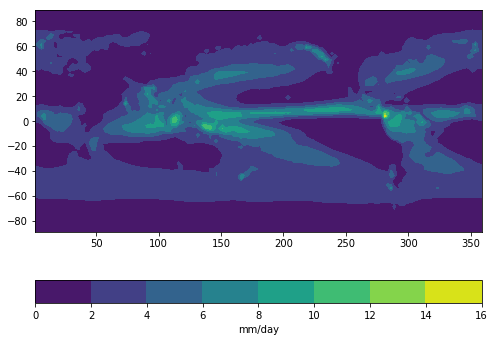

In [22]:
py.close()
fig = py.figure(figsize=(8,6))
ax = fig.add_subplot(111)
countour_plot = ax.contourf(lon, lat, meanppt) #could change colormap here too
ax.axes.set_aspect('equal')
cbar = py.colorbar(countour_plot, orientation='horizontal')
cbar.set_label('mm/day')
py.show()

#### Find location with the most precipitation

In [23]:
maxppt = np.max(meanppt)
print('Max ppt = ', maxppt, 'mm/day')

Max ppt =  14.517002 mm/day


In [24]:
#convert to meters per year
maxppt_yrs = maxppt/1000*365
print('Max ppt = ', maxppt_yrs, 'm/yr')

Max ppt =  5.298705768585205 m/yr


In [25]:
#find where that maximum precip occurs
indices = np.where(meanppt == maxppt) #the == is called a conditional statement
print(indices)

(array([37]), array([112]))


In [26]:
i = indices[0]
j = indices[1]

In [27]:
print(lat[i], lon[j])

[3.75] [281.25]


#### Nested for loops: looping over both latitude and longitude
The following example is the slow way of finding the location of maximum precip. We introduce 2 new concepts: nested for loops and conditional statements. We loop over every combination of [lat, lon] in the array and check if that precipation value is larger than our current largest value

In [35]:
maxslow = 0.0
for i in range(len(lat)):
    for j in range(len(lon)):
        if meanppt[i,j] > maxslow: #conditional statement comparing 2 values
            maxslow = meanppt[i,j] #overwrite the max value if we find a larger value
            imax = i
            jmax = j
print(maxslow)
print('lat', lat[imax], 'lon', lon[jmax])

14.517002
lat 3.75 lon 281.25


### Linear regression
Linear regression is a simple statistical modeling technique to fit a trendline through data. The best trendline is defined as the line that minimizes the sum of squared errors around the line. See the lecture slides for a full explanation

First let's explore the global burned area trend data

Text(0.5, 1.0, 'Global Fire Emissions Database Timeseries')

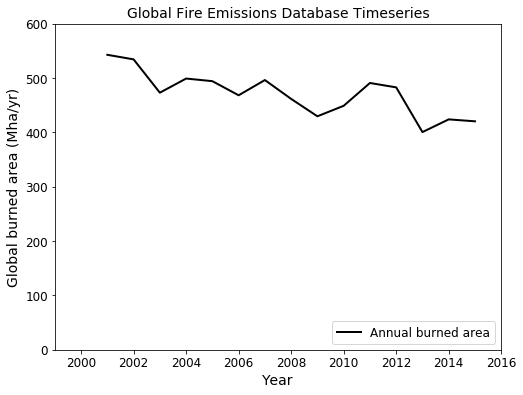

In [2]:
import matplotlib.pyplot as py
import numpy as np
import matplotlib.pyplot as py

#***read in burned area file***
filename = "burnedarea.txt"
filedata  = np.loadtxt(filename, skiprows=1, delimiter =",")
years     = filedata[:,0]
areatotal = filedata[:,1]

nyears    = len(years)

py.close()
fig = py.figure(figsize=(8,6)) # size is optional
my_font_size = 12
ax1 = fig.add_subplot(1,1,1) # (rows, cols, plot)
ax1.plot(years, areatotal, color="black", label="Annual burned area", linewidth=2)
ax1.set_ylim(0, 600)
ax1.set_xlim(1999, 2016)
ax1.set_ylabel("Global burned area (Mha/yr)", fontsize = my_font_size + 2)
ax1.set_xlabel("Year", fontsize = my_font_size+ 2)
ax1.tick_params(labelsize = my_font_size)
ax1.legend(loc = "lower right", fontsize = my_font_size)
ax1.set_title("Global Fire Emissions Database Timeseries", fontsize = my_font_size +2)

One way to guess the trendline through the data would be to calculate the slope between the first and last point

In [4]:
mguess = (areatotal[-1]-areatotal[0])/(years[-1]-years[0]) #slope
bguess = areatotal[0] - mguess*years[0] #intercept
print('guess parameters, slope: {:.2f}, intercept: {:.2f}'.format(mguess, bguess))

guess parameters, slope: -8.74, intercept: 18030.45


Text(0.5, 1.0, 'Global Fire Emissions Database Timeseries')

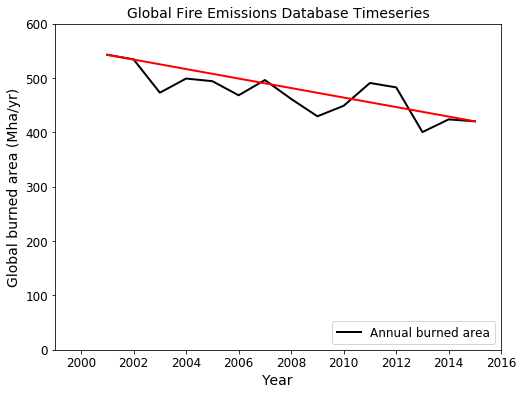

In [9]:
#plot that guessed line in red
py.close()
fig = py.figure(figsize=(8,6))
ax1 = fig.add_subplot(1,1,1) # (rows, cols, plot)
ax1.plot(years, areatotal, color="black", label="Annual burned area", linewidth=2)

yguess = mguess*years + bguess
ax1.plot(years, yguess, color='red', linewidth=2)

ax1.set_ylim(0, 600)
ax1.set_xlim(1999, 2016)
ax1.set_ylabel("Global burned area (Mha/yr)", fontsize = my_font_size + 2)
ax1.set_xlabel("Year", fontsize = my_font_size+ 2)
ax1.tick_params(labelsize = my_font_size)
ax1.legend(loc = "lower right", fontsize = my_font_size)
ax1.set_title("Global Fire Emissions Database Timeseries", fontsize = my_font_size +2)

#### Brute force method
That line was just a line that connects the first and last points. It might not be the best "fit" through all the data. Let's guess a bunch more slopes and intercepts, up to 50% bigger or 50% smaller than our above original guess. We call this the "brute force" method - guessing and checking many values to find the best ones

In [7]:
mtestrange = 0.5
btestrange = 0.5

mstart = mguess*mtestrange
mend = mguess*(1 + mtestrange)
print('m ranging from', mstart, mend)

bstart = bguess*btestrange
bend = bguess*(1 + mtestrange)
print('b ranging from', bstart, bend)

n = 1000
possibleslopes = np.linspace(mstart, mend, n) #array with 1000 values between mstart and mend
possibleintercepts = np.linspace(bstart, bend, n) #same for intercepts

m ranging from -4.3697601428571415 -13.109280428571424
b ranging from 9015.227477857141 27045.682433571423


In [15]:
sumofsquares = np.zeros([n,n])
sumofsquaresmin = 1.0e20 #a very large number

#loop over all combinations of slope and intercept (indexed with i and j, respectively)
for i in range(n):
    for j in range(n):
        ymodel = possibleslopes[i]*years + possibleintercepts[j]
        sumofsquares[i,j] = np.sum((ymodel-areatotal)**2) #sum of the squared errors over all points
        if sumofsquares[i,j] < sumofsquaresmin:
            sumofsquaresmin = sumofsquares[i,j]
            imin = i
            jmin = j

bestslope = possibleslopes[imin]
bestintercept = possibleintercepts[jmin]

print('Brute force method, slope: {:.2f} intercept: {:.2f}'.format(bestslope, bestintercept))
#this takes several seconds to run


Brute force method, slope: -7.24 intercept: 15007.33


Text(0.5, 1.0, 'Global Fire Emissions Database Timeseries')

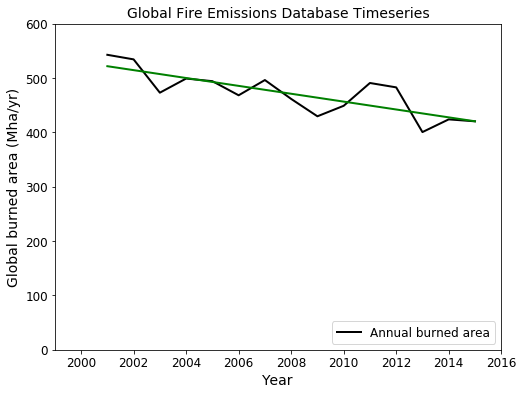

In [16]:
#plot again with this line 
py.close()
fig = py.figure(figsize=(8,6))
ax1 = fig.add_subplot(1,1,1) # (rows, cols, plot)
ax1.plot(years, areatotal, color="black", label="Annual burned area", linewidth=2)

ybrute = bestslope*years + bestintercept
ax1.plot(years, ybrute, color='green', linewidth=2)

ax1.set_ylim(0, 600)
ax1.set_xlim(1999, 2016)
ax1.set_ylabel("Global burned area (Mha/yr)", fontsize = my_font_size + 2)
ax1.set_xlabel("Year", fontsize = my_font_size+ 2)
ax1.tick_params(labelsize = my_font_size)
ax1.legend(loc = "lower right", fontsize = my_font_size)
ax1.set_title("Global Fire Emissions Database Timeseries", fontsize = my_font_size +2)

#### Scipy stats method
There are also packages that do linear regression for us. We'll try scipy.stats.linregress

In [19]:
import scipy.stats as stats

slope, intercept, rvalue, pvalue, stderr = stats.linregress(years, areatotal) #gives 5 outputs
print('best slope and intercept from scipy:', slope, intercept)

best slope and intercept from scipy: -7.361872967857144 15253.692335190477


These are slightly different from our method, probably because we didn't have a fine enough resolution of guesses to get closer. We could re-run our method with 10,000 guesses instead of 1000 but it will take a long time